In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from pathlib import Path
import sys;sys.path.append("scripts")
import os

# Load completeness per station
Compute completeness for every station for every year
1. Remove each set (year, station) if no data are reported for December or Januari (value: -1)
2. Compute the number of non-NA-values on the non-zero data series (%) (value in [0,1])

__NOTE__: These values are computed based on the original rainfall timeseries of KMI and VMM

In [20]:
df_completeness = pd.read_csv("datafiles_completeness.csv")
df_completeness["year"] = [i.split("_")[2] for i in df_completeness["datafile"]]
df_completeness["station"] = [i.split("_")[0]+"_"+i.split("_")[1] for i in df_completeness["datafile"]]

In [21]:
df_completeness.index = df_completeness["datafile"]

In [22]:
df_completeness

,source,datafile,completeness,year,station
datafile,,,,,
P01_003_2004,VMM,P01_003_2004,-1.000000,2004,P01_003
P01_003_2005,VMM,P01_003_2005,0.999447,2005,P01_003
P01_003_2006,VMM,P01_003_2006,0.999441,2006,P01_003
P01_003_2007,VMM,P01_003_2007,0.771867,2007,P01_003
P01_003_2008,VMM,P01_003_2008,0.976264,2008,P01_003
...,...,...,...,...,...
KMI_FS3_2000,KMI,KMI_FS3_2000,1.000000,2000,KMI_FS3
KMI_FS3_2001,KMI,KMI_FS3_2001,1.000000,2001,KMI_FS3
KMI_FS3_2002,KMI,KMI_FS3_2002,1.000000,2002,KMI_FS3


# Statistics of filtered data

## Load data
Non-zero rainfall data are loaded. stations for years that are incomplete (no data for januari and december, begin and ends of dataseries per station are not loaded, as these are not computed with the scripts of GV). Stations/year with data with a high amount of na values (<95 % completeness) are ommited.

In [23]:
fmap =  Path(os.getcwd()) / "elektronische_appendixB_Data"
from scripts.data_processing import load_input_data
dict_inputdata = load_input_data(fmap, df_completeness)

In [24]:
dict_inputdata

{'KMI_6414':       timestamp  value  year   station  completeness
 0        9390.0   1.00  2004  KMI_6414      0.998680
 1        9470.0   0.20  2004  KMI_6414      0.998680
 2        9480.0   0.50  2004  KMI_6414      0.998680
 3        9500.0   0.30  2004  KMI_6414      0.998680
 4        9510.0   0.10  2004  KMI_6414      0.998680
 ...         ...    ...   ...       ...           ...
 3810   525330.0   0.03  2017  KMI_6414      0.999738
 3811   525340.0   0.14  2017  KMI_6414      0.999738
 3812   525360.0   0.03  2017  KMI_6414      0.999738
 3813   525460.0   0.38  2017  KMI_6414      0.999738
 3814   525470.0   0.07  2017  KMI_6414      0.999738
 
 [43380 rows x 5 columns],
 'KMI_6418':       timestamp  value  year   station  completeness
 0          60.0   0.10  2013  KMI_6418      1.000000
 1         190.0   0.20  2013  KMI_6418      1.000000
 2         200.0   0.10  2013  KMI_6418      1.000000
 3         210.0   0.40  2013  KMI_6418      1.000000
 4         220.0   0.10  2013

## Compute statistics
Compute general statistics with .describe() functions,  and couple x and y's. Only 

In [25]:
from scripts.data_processing import compute_statistics_inputdata
resmap = "results"
compute_statistics_inputdata(dict_inputdata, resmap)

# Calculate R
See codes GV (attachment) and input data in Appendix A.

__NOTE__: The files in Appendix A are a filtered version of the rainfall timeseries of KMI and VMM

In [34]:
fmap =  Path(os.getcwd()) / "elektronische_appendixC_Rwaarden"

In [35]:
fmap.exists()

True

## Get results of cumulative R-factor

### Get files

In [36]:
from scripts.data_processing import get_files_rfactor_script
dict_output_files = get_files_rfactor_script(fmap,dict_inputdata,df_completeness)

### Create dataframes
One dataframe for each station.  
__NOTE__: Results from incomplete datasets (<0.95 coverage) are not loaded as these have not been computed! 

In [37]:
from scripts.data_processing import load_cumulative_erosivity 
dict_df_output = load_cumulative_erosivity(dict_output_files)

C:\Users\SachaGobeyn\Dropbox (Fluves)\FLUVES\PROJECTS\FL_P_2020_DepO_CNWSMod_1\07_results\2019_rfactor\oplevering\scripts\data_processing.py:152: ConversionWarning: Some errors were detected !
    Line #103 (got 1 columns instead of 3)
  filling_values=np.nan)
C:\Users\SachaGobeyn\Dropbox (Fluves)\FLUVES\PROJECTS\FL_P_2020_DepO_CNWSMod_1\07_results\2019_rfactor\oplevering\scripts\data_processing.py:152: ConversionWarning: Some errors were detected !
    Line #104 (got 1 columns instead of 3)
  filling_values=np.nan)
C:\Users\SachaGobeyn\miniconda3\envs\cnws\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\SachaGobeyn\Dropbox (Fluves)\FLUVES\PROJECTS\FL_P_2020_DepO_CNWSMod_1\07_results\2019_rfactor\oplevering

In [38]:
dict_df_output

{'KMI_6414':              cumEI30  doy
 date                     
 2004-01-15   83.7345   15
 2004-01-31   99.6548   31
 2004-02-15  123.4740   46
 2004-02-29  125.0680   60
 2004-03-15  137.6170   75
 ...              ...  ...
 2017-10-31  594.4660  304
 2017-11-15  609.8960  319
 2017-11-30  715.4190  334
 2017-12-15  799.4010  349
 2017-12-31  827.2540  365
 
 [238 rows x 2 columns],
 'KMI_6418':               cumEI30  doy
 date                      
 2013-01-15    1.13564   15
 2013-01-31   22.86350   31
 2013-02-15   44.23770   46
 2013-02-28   44.86370   59
 2013-03-15   76.26620   74
 ...               ...  ...
 2017-10-31  902.73900  304
 2017-11-15  907.95200  319
 2017-11-30  939.37800  334
 2017-12-15  966.42700  349
 2017-12-31  973.45300  365
 
 [96 rows x 2 columns],
 'KMI_6431':              cumEI30  doy
 date                     
 2013-01-15   43.1728   15
 2013-01-31   94.2621   31
 2013-02-15  108.5450   46
 2013-02-28  108.9390   59
 2013-03-15  120.2540   74
 ...   

### Reformat for half-monthly analysis

In [39]:
from scripts.data_processing import reformat_half_montlhy_analysis
dict_df_output_hm = reformat_half_montlhy_analysis(dict_df_output)

C:\Users\SachaGobeyn\miniconda3\envs\cnws\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
dict_df_output_hm

{'KMI_6414': year       2004       2005        2006       2007        2008       2010  \
 md                                                                         
 0115    83.7345     3.2375     1.14910    19.4718     5.62802        NaN   
 0131    99.6548    11.4574     6.25747    43.0785    11.87210    14.0914   
 0215   123.4740    24.9288    21.13090    67.4607    65.04630    16.5393   
 0228   125.0680    30.4786    51.68480    75.1760    66.32630    25.7169   
 0315   137.6170    35.2288    61.54790    92.0362    88.98930    42.7572   
 0331   166.6460    39.0408    84.53040   105.1570   109.86600    94.9475   
 0415   174.8200    47.6251    91.68190   105.1570   110.62000   123.2070   
 0430   207.0070    52.5513    94.67160   105.1570   118.60000   129.9920   
 0515   216.7360   187.4160   119.68700   115.8480   127.28600   131.1870   
 0531   222.1920   215.4860   244.02800   137.8610   349.24500   160.4130   
 0615   265.4230   225.3750   260.37200   158.2630   450.20500  

### Generate table output

In [41]:
n_records = np.sum([len(dict_df_output_hm [i].columns) for i in dict_df_output_hm.keys()])
columns = ["station","year","value","Flanders","Belgium"]
df_R_yearly =  pd.DataFrame(data=np.zeros([n_records,len(columns)]),columns=columns)

ind = 0

for station in dict_df_output_hm.keys():
    
    for year in dict_df_output_hm[station].columns:
        
        value = dict_df_output_hm[station][year].iloc[-1]
        
        if station in ["KMI_6447","KMI_FS3"]:
            Belgium = 0
            Flanders = 0
            Ukkel = 1
        elif station in ["KMI_6455","KMI_6459","KMI_6472","KMI_6494"]:
            Flanders = 0
            Belgium = 1
            Ukkel = 0
        else:
            Belgium = 1
            Flanders = 1
            Ukkel = 0
        df_R_yearly.loc[ind, ["station","year","value","Ukkel","Flanders","Belgium"]] = [station, year, value, Ukkel, Flanders, Belgium]        
        
        ind += 1
        
df_R_yearly.to_csv(Path(resmap) / "Ryearly_allstations_filtereddata.csv")

# Analysis

## Values for Flanders and Belgium

Average value for Flanders (excl. Ukkel)

In [42]:
np.mean(df_R_yearly.loc[df_R_yearly["Flanders"]==1,"value"])

1226.1901898734175

Average value for Belgium (excl. Ukkel)

In [43]:
np.mean(df_R_yearly.loc[df_R_yearly["Belgium"]==1,"value"])

1252.0192536231884

## Ukkel: long term   
Two timeseries: 
 - KMI_FS from 1989 to 2002  
 - KMI_6447 from 2003 to 2017  

In [44]:
dict_df_output_hm["Ukkel_samen"] = pd.concat([dict_df_output_hm["KMI_FS3"],dict_df_output_hm["KMI_6447"]], axis=1)
dict_df_output_hm["Ukkel_samen"].to_csv(Path(resmap) / "Ryearly_Ukkel_filtereddata.csv")

Compute different values for Ukkel, for different time periods

In [45]:
a= [[1898,2002],
    [1898,2019],
    [2003,2019],
    [1996,2019],
    [1990,2019],
    [1990,2000],
    [2000,2019]]
pres = {}
for j in a:
    col = np.arange(j[0],j[1]+1,1)
    col = [i for i in col if i in dict_df_output_hm["Ukkel_samen"].columns]
    col_fill_nan = [i for i in col if i not in dict_df_output_hm["Ukkel_samen"].columns]
    for i in col_fill_nan:
        dict_df_output_hm["Ukkel_samen"][i] = np.nan
    pres[str(j)+"_mean"] = np.nanmean(dict_df_output_hm["Ukkel_samen"][col].iloc[-1])
    pres[str(j)+"_median"] =np.nanmedian(dict_df_output_hm["Ukkel_samen"][col].iloc[-1])

In [47]:
pres

{'[1898, 2002]_mean': 958.1060095238096,
 '[1898, 2002]_median': 927.272,
 '[1898, 2019]_mean': 1005.0358429752067,
 '[1898, 2019]_median': 941.024,
 '[2003, 2019]_mean': 1313.012875,
 '[2003, 2019]_median': 1094.6799999999998,
 '[1996, 2019]_mean': 1260.632956521739,
 '[1996, 2019]_median': 1095.0,
 '[1990, 2019]_mean': 1244.8973103448272,
 '[1990, 2019]_median': 1095.0,
 '[1990, 2000]_mean': 1094.643272727273,
 '[1990, 2000]_median': 1073.07,
 '[2000, 2019]_mean': 1302.7792631578948,
 '[2000, 2019]_median': 1146.81}

Figure

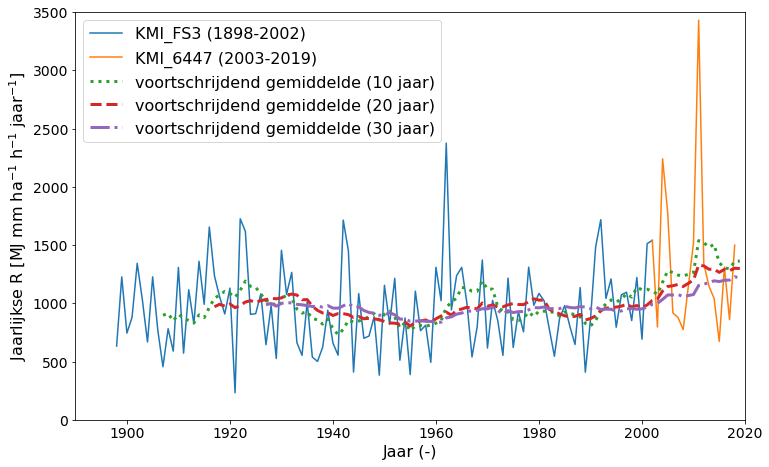

In [48]:
out = dict_df_output_hm["Ukkel_samen"]
plt.figure(figsize=[12,7.5])
col = np.arange(1898,2003,1)
col = [i for i in col if i in dict_df_output_hm["Ukkel_samen"].columns]
plt.plot(col,out[col].iloc[-1],label="KMI_FS3 (1898-2002)")
col = np.arange(2002,2019,1)
col = [i for i in col if i in dict_df_output_hm["Ukkel_samen"].columns]
plt.plot(col,out[col].iloc[-1],label="KMI_6447 (2003-2019)")

# rolling mean
y = out.iloc[-1].rolling(10).mean()
x = y.index
plt.plot(x,y,ls=':',lw=3,label='voortschrijdend gemiddelde (10 jaar)')
y = out.iloc[-1].rolling(20).mean()
x = y.index
plt.plot(x,y,ls='--',lw=3,label='voortschrijdend gemiddelde (20 jaar)')
y = out.iloc[-1].rolling(30).mean()
x = y.index
plt.plot(x,y,ls='-.',lw=3,label='voortschrijdend gemiddelde (30 jaar)')
plt.ylim([0,3500])
plt.xlim([1890,2020])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel(r'Jaar (-)',fontsize=16)
plt.ylabel(r'Jaarlijkse R [MJ mm ha$^{-1}$ h$^{-1}$ jaar$^{-1}$]',fontsize=16)
plt.legend(prop={'size':16})

Compare results of Ukkel with other average of other stations

In [51]:
coldf = ["station","rc","offset","afstand","p","r_value","n","dR","meanR"]
out = pd.DataFrame(data = np.zeros([len(dict_df_output_hm)-3,len(coldf)]),columns=coldf)
ind = 0

for i in dict_df_output_hm.keys():
    
    if (i!="Ukkel_samen") & (i!="KMI_FS3") & (i!="KMI_6447"):
        col = dict_df_output_hm["Ukkel_samen"].columns
        col_fill_nan = [j for j in col if j not in dict_df_output_hm[i].columns]
        for j in col_fill_nan:
            dict_df_output_hm[i][j] = np.nan
        y = dict_df_output_hm[i][col].iloc[-1]
        x = dict_df_output_hm["Ukkel_samen"][col].iloc[-1]
        x = x[~np.isnan(y)]        
        y = y[~np.isnan(y)]
        df_i = pd.DataFrame()
        df_i[i] = x.values.flatten()
        df_i["Ukkel (KMI_FS3 & KMI_6447)"] = y.values.flatten()
        df_i = df_i.sort_values("Ukkel (KMI_FS3 & KMI_6447)")
        
        out["dR"].loc[ind] = np.mean(dict_df_output_hm[i].iloc[-1])-np.mean(dict_df_output_hm["Ukkel_samen"].iloc[-1])
        out["meanR"].loc[ind] = np.mean(dict_df_output_hm[i].iloc[-1])
        ind += 1

out.to_csv(Path(resmap) / "stat_allstations_res.csv")